# Import Basic Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [3]:
kyp = pd.read_csv('kyphosis.csv')
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# Exploratory Data Analysis

In [5]:
kyp.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
### check null value
kyp.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
kyp[kyp.columns[:5]].corr().style.background_gradient(cmap='Blues')

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


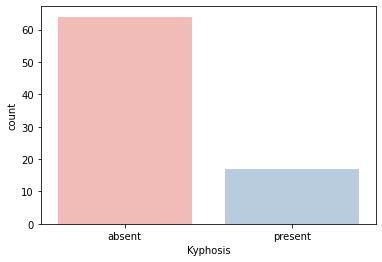

In [14]:
### plot the target variable
sns.countplot(x='Kyphosis', data = kyp,  palette='Pastel1')
plt.show()

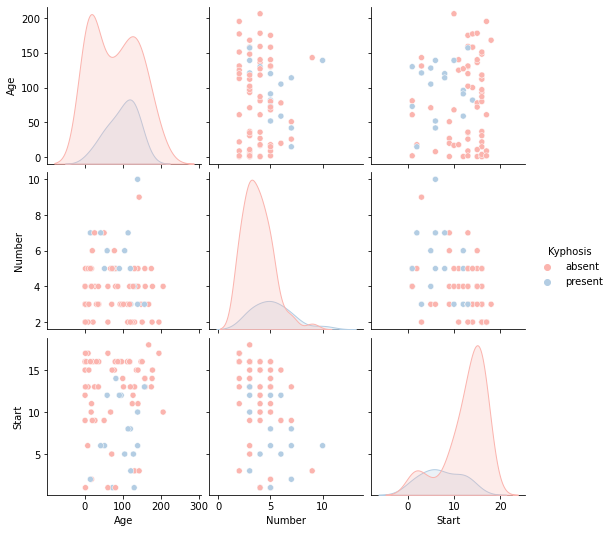

In [15]:
sns.pairplot(kyp, hue='Kyphosis',palette='Pastel1')
plt.show()

# Splitting The Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, 
                                       confusion_matrix

In [20]:
x = kyp.drop('Kyphosis',axis=1)
y = kyp['Kyphosis']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y,test_size=0.25,random_state=10,
                                             stratify=y)

In [22]:
### creat decision tree object
dt = DecisionTreeClassifier(max_depth = 2, random_state = 10)

# Modeling

In [23]:
### fit the model
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [24]:
### prediction
pred = dt.predict(xtest)

In [25]:
acc = accuracy_score(pred, ytest)
print('Test set accuracy is : {:.2f}'.format(acc))

Test set accuracy is : 0.71
